In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset 
dataset = pd.read_csv('/kaggle/input/student-mental-health/Student Mental health.csv') 

In [3]:
# Display first few rows of the dataset
print("First 5 rows of the dataset:")
print(dataset.head())

First 5 rows of the dataset:
        Timestamp Choose your gender   Age What is your course?  \
0  8/7/2020 12:02             Female  18.0          Engineering   
1  8/7/2020 12:04               Male  21.0    Islamic education   
2  8/7/2020 12:05               Male  19.0                  BIT   
3  8/7/2020 12:06             Female  22.0                 Laws   
4  8/7/2020 12:13               Male  23.0         Mathemathics   

  Your current year of Study What is your CGPA? Marital status  \
0                     year 1        3.00 - 3.49             No   
1                     year 2        3.00 - 3.49             No   
2                     Year 1        3.00 - 3.49             No   
3                     year 3        3.00 - 3.49            Yes   
4                     year 4        3.00 - 3.49             No   

  Do you have Depression? Do you have Anxiety? Do you have Panic attack?  \
0                     Yes                   No                       Yes   
1                  

In [4]:
# Basic information about the dataset
print("\nDataset Info:")
print(dataset.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 

In [5]:
# Statistical summary of numerical columns
print("\nStatistical Summary:")
print(dataset.describe())


Statistical Summary:
             Age
count  100.00000
mean    20.53000
std      2.49628
min     18.00000
25%     18.00000
50%     19.00000
75%     23.00000
max     24.00000


In [6]:
# Check for missing values
print("\nMissing Values:")
print(dataset.isnull().sum())


Missing Values:
Timestamp                                       0
Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


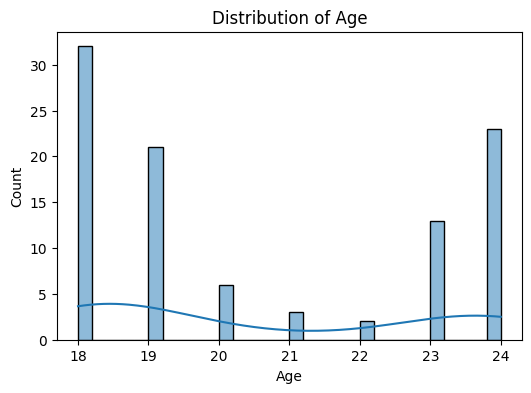

In [7]:
# Distribution of numerical columns
numerical_columns = dataset.select_dtypes(include=[np.number]).columns.tolist()
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(dataset[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

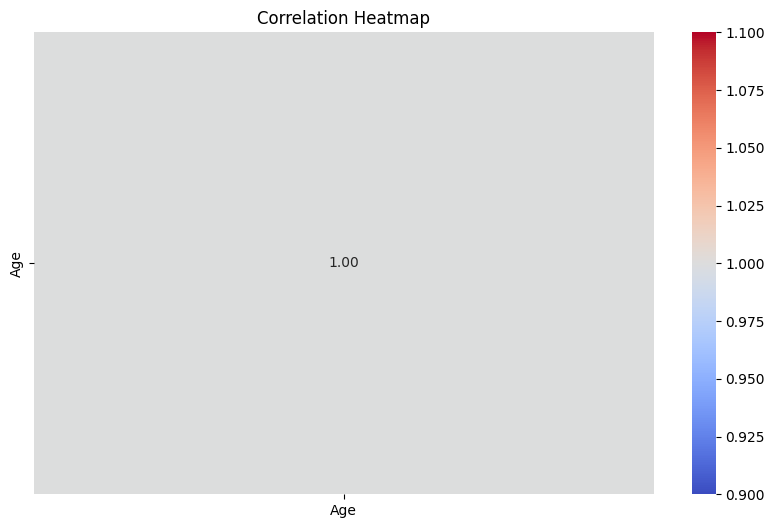

In [8]:
# Select only numerical columns for correlation matrix
numerical_dataset = dataset.select_dtypes(include=[np.number])

# Check if there are numerical columns before plotting
if numerical_dataset.shape[1] > 0:
    # Compute correlation matrix
    correlation_matrix = numerical_dataset.corr()
    
    # Plot heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title("Correlation Heatmap")
    plt.show()
else:
    print("No numerical columns available for correlation.")

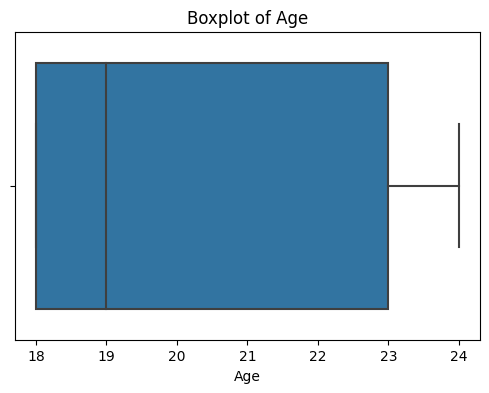

In [10]:
# Boxplot to check for outliers
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=dataset, x=col)
    plt.title(f"Boxplot of {col}")
    plt.show()

In [11]:
# Convert all numerical columns to the correct type (if necessary)
numerical_dataset = dataset.select_dtypes(include=[np.number])
dataset[numerical_dataset.columns] = numerical_dataset.apply(pd.to_numeric, errors='coerce')

# Fill missing values with the median for numerical columns
dataset[numerical_dataset.columns] = dataset[numerical_dataset.columns].fillna(dataset[numerical_dataset.columns].median())

# Re-check missing values
print("\nMissing Values after filling:")
print(dataset.isnull().sum())


Missing Values after filling:
Timestamp                                       0
Choose your gender                              0
Age                                             0
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64


In [12]:
# Save the cleaned dataset
dataset.to_csv('cleaned_data.csv', index=False)
print("Cleaned dataset saved as 'cleaned_data.csv'.")

Cleaned dataset saved as 'cleaned_data.csv'.
